# Exploitation des résultats

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import datetime

## Fusion des différents .csv

In [3]:
data_path = Path("C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats/resultats_fin")
file_names = ["results_api_sirac", "results_api_velo", "results_api_parking_"]
df_parking = pd.DataFrame()
df_sirac = pd.DataFrame()
df_velo = pd.DataFrame()

In [4]:
for file in data_path.iterdir():
    file_name = file.name[:-14]
    print(file_name)
    df_file = pd.read_csv(file, sep = ";")
    

    if file_name == "results_api_sirac":
        df_sirac = pd.concat([df_sirac, df_file], ignore_index=True)

    elif file_name == "results_api_velo":
        df_velo = pd.concat([df_velo, df_file], ignore_index=True)
    
    else :
        df_parking = pd.concat([df_parking, df_file], ignore_index = True)

    

results_api_parking_
results_api_parking_
results_api_parking_
results_api_sirac
results_api_sirac
results_api_sirac
results_api_velo
results_api_velo
results_api_velo


In [5]:
df_parking.to_csv("api_parking_maj_2025_12_17.csv", index=False, sep = ";")
df_velo.to_csv("api_velo_maj_2025_12_17.csv", index=False, sep = ";")
df_sirac.to_csv("api_sirac_maj_2025_12_17.csv", index=False, sep = ";")

## Répartition par zone

In [2]:
path_parking = "C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats4/api_parking_maj_2025_12_17.csv"
path_velo = "C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats4/api_velo_maj_2025_12_17.csv"
path_sirac = "C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats4/api_sirac_maj_2025_12_17.csv"

In [3]:
df_parking = pd.read_csv(path_parking, sep = ";")
df_parking = df_parking.rename(columns = {'nom_parking' : 'name'})
df_velo = pd.read_csv(path_velo, sep = ";")
df_velo = df_velo.rename(columns = {'na' : 'name', 'lat' : 'latitude', 'lon' : 'longitude'})
df_sirac = pd.read_csv(path_sirac, sep = ";")
list_df = [df_parking, df_velo, df_sirac]

coordinates_parking = {"name" : [], "lat" : [], "lon" : [], "zone" : []}
coordinates_velo = {"name" : [], "lat" : [], "lon" : [], "zone" : []}
coordinates_sirac = {"name" : [], "lat" : [], "lon" : [], "zone" : []}
list_coordinates = [coordinates_parking, coordinates_velo, coordinates_sirac]

In [4]:
for i, df in enumerate(list_df) :
    coordinates = list_coordinates[i]
    for index, row in df.iterrows():
        if row['name'] not in coordinates['name']:
            lat = row['latitude']
            lon = row['longitude']
            coordinates['name'].append(row['name'])
            coordinates['lat'].append(lat)
            coordinates['lon'].append(lon)
            if 48.574000<=lat<=48.589548 and 7.729512<=lon<=7.761337:
                coordinates['zone'].append(1)
            elif 48.546028<=lat<=48.614336 and 7.708821<=lon<=7.773942:
                coordinates['zone'].append(2)
            else :
                coordinates['zone'].append(3)

In [5]:
df_coordinates_parking = pd.DataFrame(coordinates_parking)
df_coordinates_velo = pd.DataFrame(coordinates_velo)
df_coordinates_sirac = pd.DataFrame(coordinates_sirac)

In [6]:
parking_PR = ["Parking Baggersee", "Parking Ducs d'Alsace", "Parking Elsau", "Parking Espace européen de l'entreprise",
              "Parking Hoenheim gare", "Parking Kibitzenau", "Parking Parc des Romains", "Parking Poteries", 
              "Parking Rives de l'Aar", "Parking Robertsau Boecklin","Parking Rotonde"] 

df_coordinates_parking['type'] = np.nan


for idx, row in df_coordinates_parking.iterrows():
    if row['name'] in parking_PR :
        df_coordinates_parking.at[idx, 'type'] = "P&R"

C:\Users\ajard\AppData\Local\Temp\ipykernel_19416\4091567197.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'P&R' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_coordinates_parking.at[idx, 'type'] = "P&R"


In [7]:
df_coordinates_parking

,name,lat,lon,zone,type
0,Parking Gare Wodli,48.587385,7.736771,1,NaN
1,Parking Zénith,48.595335,7.686467,3,NaN
2,Parking Centre Opéra Broglie,48.585689,7.749275,1,NaN
3,Parking Baggersee,48.544647,7.735695,3,P&R
4,Parking Bateliers,48.581002,7.756048,1,NaN
5,Parking Austerlitz,48.577964,7.751796,1,NaN
6,Parking Gutenberg,48.581561,7.748285,1,NaN
7,Parking Kleber Homme de fer,48.583497,7.745063,1,NaN
8,Parking Halles P1 Marais vert,48.587362,7.739375,1,NaN
9,Parking P2 Sebastopol,48.586790,7.742152,1,NaN


## Calcul de l'évolution du remplissage des parkings par zone

In [8]:
parking_zone1 = df_coordinates_parking[df_coordinates_parking['zone'] == 1]['name'].to_list()
parking_zone2 = df_coordinates_parking[df_coordinates_parking['zone'] == 2]['name'].to_list()
parking_zone3 = df_coordinates_parking[df_coordinates_parking['zone'] == 3]['name'].to_list()

In [9]:
df_parking = pd.read_csv("api_parking_maj_2025_12_17.csv", sep = ';')
df_parking = df_parking.rename(columns = {'nom_parking' : 'name'})
df_parking['time'] = pd.to_datetime(df_parking['time'])

In [10]:
df_parking = pd.merge(df_parking, df_coordinates_parking, on = 'name', how = 'inner' )
df_parking = df_parking[['name', 'time', 'total', 'libre', 'lat', 'lon', 'zone', 'type']]
df_parking['heure_arrondie'] = df_parking['time'].dt.floor('30T')
df_parking['demi_heure'] = df_parking['time'].dt.floor('30T').dt.time
df_parking['jour_semaine'] = df_parking['time'].dt.day_name()
df_parking['taux_remplissage'] = (df_parking['total'] - df_parking['libre'])/df_parking['total']

C:\Users\ajard\AppData\Local\Temp\ipykernel_19416\1416495119.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_parking['heure_arrondie'] = df_parking['time'].dt.floor('30T')
C:\Users\ajard\AppData\Local\Temp\ipykernel_19416\1416495119.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_parking['demi_heure'] = df_parking['time'].dt.floor('30T').dt.time


In [11]:
df_parking[df_parking['name']=='Parking Gare Wodli']

,name,time,total,libre,lat,lon,zone,type,heure_arrondie,demi_heure,jour_semaine,taux_remplissage
0,Parking Gare Wodli,2025-11-12 20:35:16,955,371,48.587385,7.736771,1,NaN,2025-11-12 20:30:00,20:30:00,Wednesday,0.611518
21,Parking Gare Wodli,2025-11-12 21:05:17,955,365,48.587385,7.736771,1,NaN,2025-11-12 21:00:00,21:00:00,Wednesday,0.617801
42,Parking Gare Wodli,2025-11-12 21:35:17,955,371,48.587385,7.736771,1,NaN,2025-11-12 21:30:00,21:30:00,Wednesday,0.611518
63,Parking Gare Wodli,2025-11-12 22:05:18,955,375,48.587385,7.736771,1,NaN,2025-11-12 22:00:00,22:00:00,Wednesday,0.607330
84,Parking Gare Wodli,2025-11-12 22:35:19,955,371,48.587385,7.736771,1,NaN,2025-11-12 22:30:00,22:30:00,Wednesday,0.611518
...,...,...,...,...,...,...,...,...,...,...,...,...
33159,Parking Gare Wodli,2025-12-17 11:06:24,955,55,48.587385,7.736771,1,NaN,2025-12-17 11:00:00,11:00:00,Wednesday,0.942408
33180,Parking Gare Wodli,2025-12-17 11:36:26,955,62,48.587385,7.736771,1,NaN,2025-12-17 11:30:00,11:30:00,Wednesday,0.935079
33201,Parking Gare Wodli,2025-12-17 12:06:34,955,48,48.587385,7.736771,1,NaN,2025-12-17 12:00:00,12:00:00,Wednesday,0.949738
33222,Parking Gare Wodli,2025-12-17 12:36:35,955,48,48.587385,7.736771,1,NaN,2025-12-17 12:30:00,12:30:00,Wednesday,0.949738


In [12]:
def taux_remplissage(df):
    return((df['total'] - df['libre'])/df['total'].mean())

In [13]:
avg_libre_par_heure1 = df_parking[df_parking['zone']==1].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure2 = df_parking[df_parking['zone']==2].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure3 = df_parking[df_parking['zone']==3].groupby('heure_arrondie')['libre'].mean().reset_index()

<Axes: title={'center': 'Nombre de places libres en moyenne dans les parkings de la zone 3'}, xlabel='heure'>

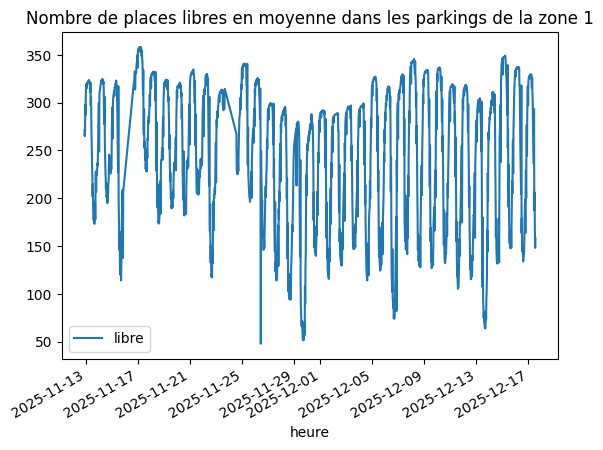

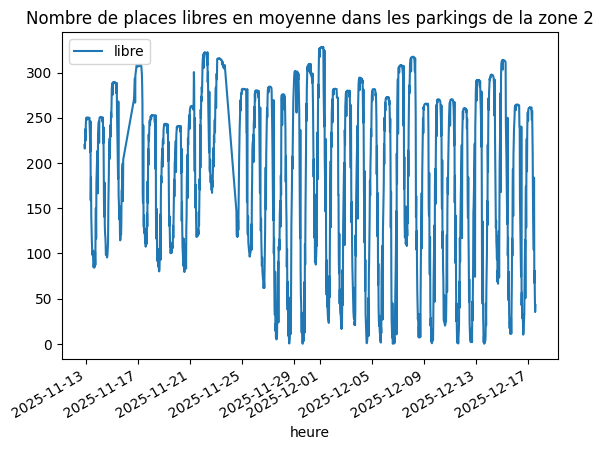

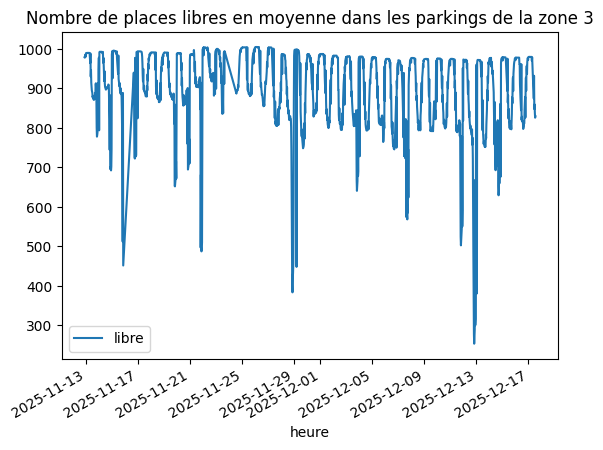

In [14]:
avg_libre_par_heure1.plot(x = "heure_arrondie", y = "libre", title = "Nombre de places libres en moyenne dans les parkings de la zone 1", xlabel="heure")
avg_libre_par_heure2.plot(x = "heure_arrondie", y = "libre",title = "Nombre de places libres en moyenne dans les parkings de la zone 2", xlabel="heure")
avg_libre_par_heure3.plot(x = "heure_arrondie", y = "libre",title = "Nombre de places libres en moyenne dans les parkings de la zone 3", xlabel="heure")

<Axes: title={'center': 'Nombre de places libres en moyenne dans les parkings classiques'}, xlabel='heure'>

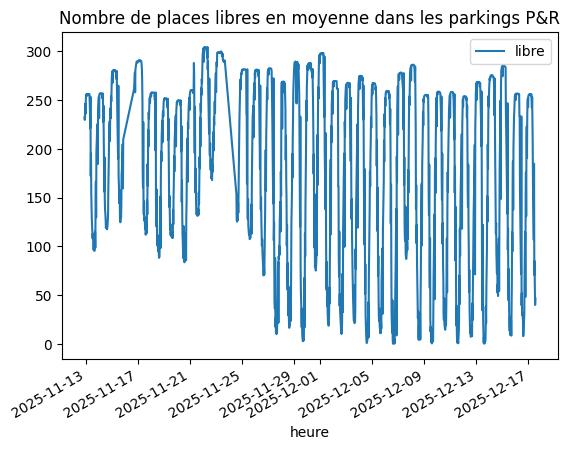

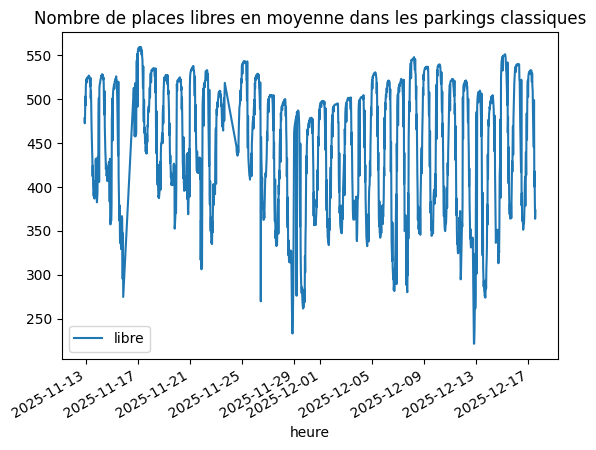

In [15]:
avg_libre_par_heure_PR = df_parking[df_parking['type']=="P&R"].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure_classique = df_parking[df_parking['type']!="P&R"].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure_PR.plot(x = "heure_arrondie", y = "libre", title = "Nombre de places libres en moyenne dans les parkings P&R", xlabel="heure")
avg_libre_par_heure_classique.plot(x = "heure_arrondie", y = "libre", title = "Nombre de places libres en moyenne dans les parkings classiques", xlabel="heure")

## Journée type

In [16]:
jour_ouvre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
week_end = ['Saturday', 'Sunday']
debut_marche = pd.to_datetime('2025-11-26')

In [17]:
df_parking_avant_marche = df_parking[df_parking['time']<debut_marche]
df_parking_apres_marche = df_parking[df_parking['time']>=debut_marche]

df_parking_avant_marche_1 = df_parking_avant_marche[df_parking_avant_marche['zone']==1]
df_parking_avant_marche_2 = df_parking_avant_marche[df_parking_avant_marche['zone']==2]
df_parking_avant_marche_3 = df_parking_avant_marche[df_parking_avant_marche['zone']==3]

df_parking_apres_marche_1 = df_parking_apres_marche[df_parking_apres_marche['zone']==1]
df_parking_apres_marche_2 = df_parking_apres_marche[df_parking_apres_marche['zone']==2]
df_parking_apres_marche_3 = df_parking_apres_marche[df_parking_apres_marche['zone']==3]

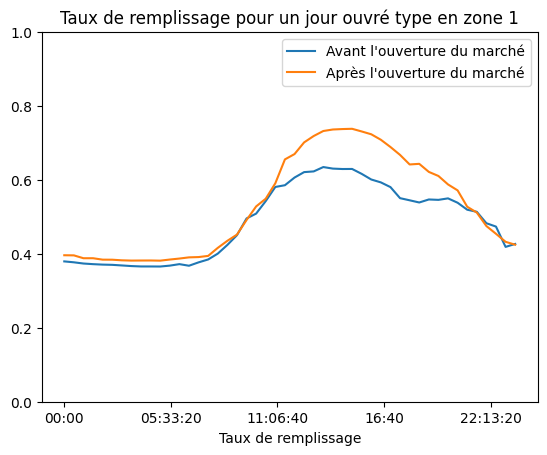

In [18]:
# Journée type en jour ouvré zone 1

df_parking_avant_marche_1_ouvre = df_parking_avant_marche_1[df_parking_avant_marche_1['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_1_ouvre = df_parking_apres_marche_1[df_parking_apres_marche_1['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_1_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 1', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Avant l'ouverture du marché")

df_parking_apres_marche_1_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 1', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Après l'ouverture du marché",
                                     ylim = (0,1))

plt.legend()

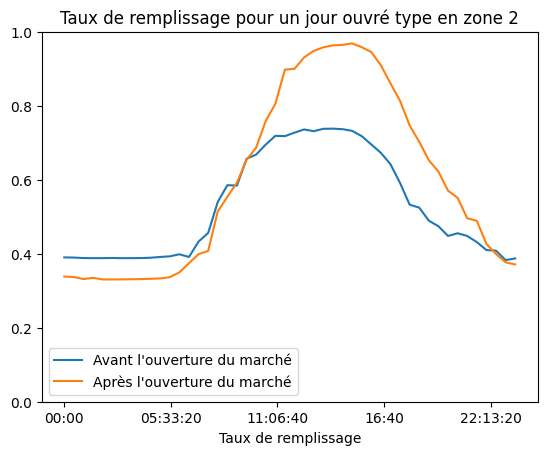

In [19]:
# Journée type en jour ouvré zone 2

df_parking_avant_marche_2_ouvre = df_parking_avant_marche_2[df_parking_avant_marche_2['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_2_ouvre = df_parking_apres_marche_2[df_parking_apres_marche_2['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_2_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 2', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Avant l'ouverture du marché")

df_parking_apres_marche_2_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 2', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Après l'ouverture du marché",
                                     ylim = (0,1))

plt.legend()

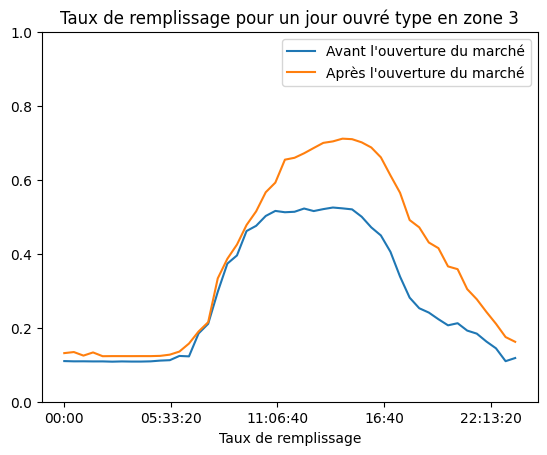

In [20]:
# Journée type en jour ouvré zone 3

df_parking_avant_marche_3_ouvre = df_parking_avant_marche_3[df_parking_avant_marche_3['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_3_ouvre = df_parking_apres_marche_3[df_parking_apres_marche_3['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_3_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 3', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Avant l'ouverture du marché")

df_parking_apres_marche_3_ouvre.plot(title = 'Taux de remplissage pour un jour ouvré type en zone 3', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Après l'ouverture du marché",
                                     ylim = (0,1))

plt.legend()

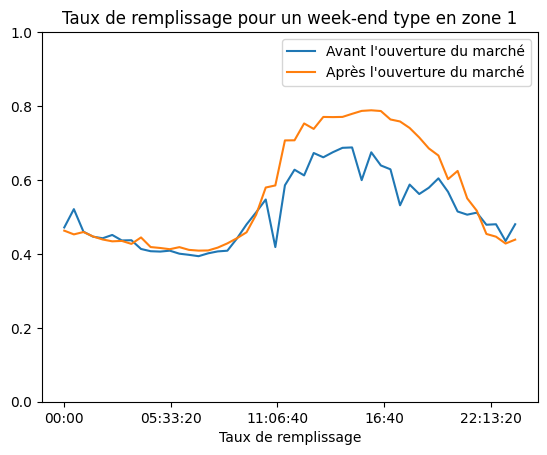

In [21]:
# Journée type en week-end zone 1

df_parking_avant_marche_1_we = df_parking_avant_marche_1[df_parking_avant_marche_1['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_1_we = df_parking_apres_marche_1[df_parking_apres_marche_1['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_1_we.plot(title = 'Taux de remplissage pour un week-end type en zone 1', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Avant l'ouverture du marché")

df_parking_apres_marche_1_we.plot(title = 'Taux de remplissage pour un week-end type en zone 1', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Après l'ouverture du marché",
                                     ylim = (0,1))

plt.legend()

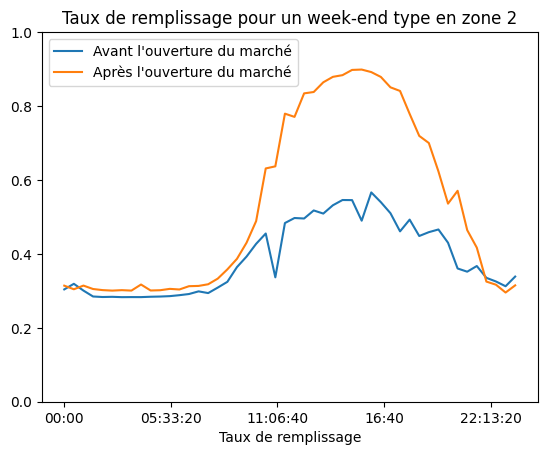

In [22]:
# Journée type en week-end zone 2

df_parking_avant_marche_2_we = df_parking_avant_marche_2[df_parking_avant_marche_2['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_2_we = df_parking_apres_marche_2[df_parking_apres_marche_2['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_2_we.plot(title = 'Taux de remplissage pour un week-end type en zone 2', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Avant l'ouverture du marché")

df_parking_apres_marche_2_we.plot(title = 'Taux de remplissage pour un week-end type en zone 2', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Après l'ouverture du marché",
                                     ylim = (0,1))

plt.legend()

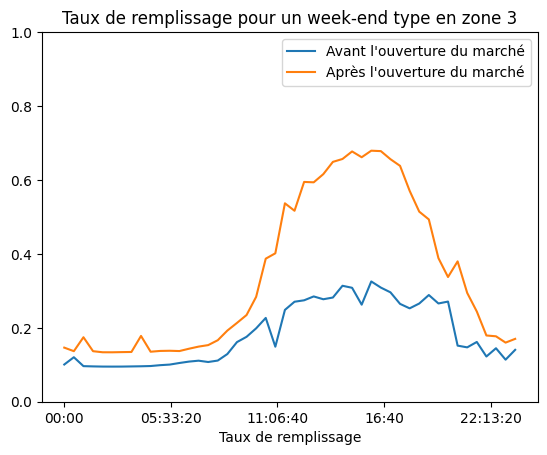

In [23]:
# Journée type en week-end zone 3

df_parking_avant_marche_3_we = df_parking_avant_marche_3[df_parking_avant_marche_3['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()
df_parking_apres_marche_3_we = df_parking_apres_marche_3[df_parking_apres_marche_3['jour_semaine'].isin(week_end)].groupby('demi_heure')['taux_remplissage'].mean()

df_parking_avant_marche_3_we.plot(title = 'Taux de remplissage pour un week-end type en zone 3', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Avant l'ouverture du marché")

df_parking_apres_marche_3_we.plot(title = 'Taux de remplissage pour un week-end type en zone 3', 
                                     xlabel = 'Taux de remplissage',
                                     label= "Après l'ouverture du marché",
                                     ylim = (0,1))

plt.legend()

## Représentation avec une carte

In [ ]:
# Importation des bibliothèques pour la manipulation des objets géographiques.
import shapely
import geopandas as gpd
import folium

# Traitement d'un problème avec la projection --> déclarer la librairie de projection.
import os
from pyproj import Proj
os.environ['PROJ_LIB']=r"C:\ProgramData\Anaconda3\Library\share"

In [54]:
# Créer la carte avec des tuiles CartoDB Positron (fond clair)
m_base = folium.Map(
    location=[48.5839, 7.7455],
    zoom_start=12,
    tiles="CartoDB positron"  # Fond clair et épuré
)
m_base.save("base.html")

In [ ]:
# # Créer une carte avec centrée à Strasbourg.
# m = folium.Map(location = ['48.5839', '7.7455']) 

# # Modifier le premier zoom.
# m = folium.Map(location = ['48.5839', '7.7455'], zoom_start=12) 

# Créer la carte avec des tuiles CartoDB Positron (fond clair)
m = folium.Map(
    location=[48.5839, 7.7455],
    zoom_start=12,
    tiles="CartoDB positron"  # Fond clair et épuré
)

In [58]:
# Définition des zones
carre = folium.Rectangle(
    bounds=[
        [48.508347 , 7.655548],  # coin sud-ouest
        [48.642825 , 7.801724]   # coin nord-est
    ],
    color="red",
    fill=False,
    fill_opacity=0.3
)

carre2 = folium.Rectangle(
    bounds=[
        [48.546028 , 7.708821],  # coin sud-ouest
        [48.614336 , 7.773942]   # coin nord-est
    ],
    color="red",
    fill=False,
    fill_opacity=0.3
)

carre3 = folium.Rectangle(
    bounds=[
        [48.574000 , 7.729512],  # coin sud-ouest
        [48.589548 , 7.761337]   # coin nord-est
    ],
    color="red",
    fill=False,
    fill_opacity=0.3
)

carre.add_to(m)
carre2.add_to(m)
carre3.add_to(m)

In [59]:
# Lire le fichier GeoJSON
gdf = gpd.read_file("arcfeature_sirac.geojson")

# Afficher les premières lignes pour vérifier le contenu
print(gdf.head())

   id                        name  \
0   1   Schirmeck1 - Entree Ville   
1   2   Schirmeck2 - Sortie Ville   
2   5   Schirmeck5 - Entree Ville   
3   7   Schirmeck7 - Entree Ville   
4  10  Schirmeck10 - Sortie Ville   

                                        geo_point_2d  \
0  {'lon': 7.698018165358953, 'lat': 48.562080319...   
1  {'lon': 7.697829959308189, 'lat': 48.562225416...   
2  {'lon': 7.708155213918222, 'lat': 48.566286178...   
3  {'lon': 7.7092024856000005, 'lat': 48.5676049589}   
4  {'lon': 7.7100345749592885, 'lat': 48.56889045...   

                                            geometry  
0  LINESTRING (7.69548 48.56167, 7.69764 48.56193...  
1  LINESTRING (7.70022 48.56284, 7.69855 48.56232...  
2  LINESTRING (7.70766 48.56572, 7.70791 48.56599...  
3    LINESTRING (7.70892 48.56726, 7.70948 48.56795)  
4  LINESTRING (7.71044 48.5694, 7.7098 48.56859, ...  


In [60]:
# Définir la fonction de style 

def style_function(feature):
    return {
        'color': '#333333',  # Gris foncé
        'weight': 2,          # Épaisseur de la ligne
        'opacity': 1       # Opacité de la ligne
    }

# Ajouter les routes à la carte
folium.GeoJson(
    gdf,
    style_function=style_function
).add_to(m)

In [61]:
# Lire le fichier CSV
df = pd.read_csv("coordinates_parking.csv", sep = ";")
df = df.iloc[:-1]

# Vérifier les données
print(df.head())

for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=4,  # Taille du point
        color="blue",  # Couleur de la bordure
        fill=True,
        fill_color="blue"  # Couleur de remplissage
    ).add_to(m)

   Unnamed: 0                          name        lat       lon  zone
0           0            Parking Gare Wodli  48.587385  7.736771     1
1           1                Parking Zénith  48.595335  7.686467     3
2           2  Parking Centre Opéra Broglie  48.585689  7.749275     1
3           3             Parking Baggersee  48.544647  7.735695     3
4           4             Parking Bateliers  48.581002  7.756048     1


In [62]:
# Lire le fichier CSV
df = pd.read_csv("coordinates_velo.csv", sep = ";")

# Vérifier les données
print(df.head())

for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=4,  # Taille du point
        color="green",  # Couleur de la bordure
        fill=True,
        fill_color="green"  # Couleur de remplissage
    ).add_to(m)

   Unnamed: 0                       name        lat       lon  zone
0           0             Bischheim Gare  48.611639  7.742056     2
1           1  Bischheim Espace Européen  48.616361  7.720056     3
2           2              Entzheim Gare  48.547222  7.628056     3
3           3          Geispolsheim Gare  48.521222  7.684944     3
4           4              Hoenheim Gare  48.628333  7.758833     3


In [63]:
m.save("tmp.html")